# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Read dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

### Dataset Attributes
- CustomerID : Unique ID of the customer
- Gender : Gender of the customer (Male or Female)
- Age : Age of the customer
- Annual Income (k$) : Annual Income of the customer
- Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

# Dataset Information

In [20]:
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Summary
- No null values
- 200 Records
- Average age is 38
- Average income is 60k (Almost the same as the average for US citizins)
- Spending score has a mean of 50

# Exploratory Data Analysis

### Distributions

<Figure size 1500x500 with 0 Axes>

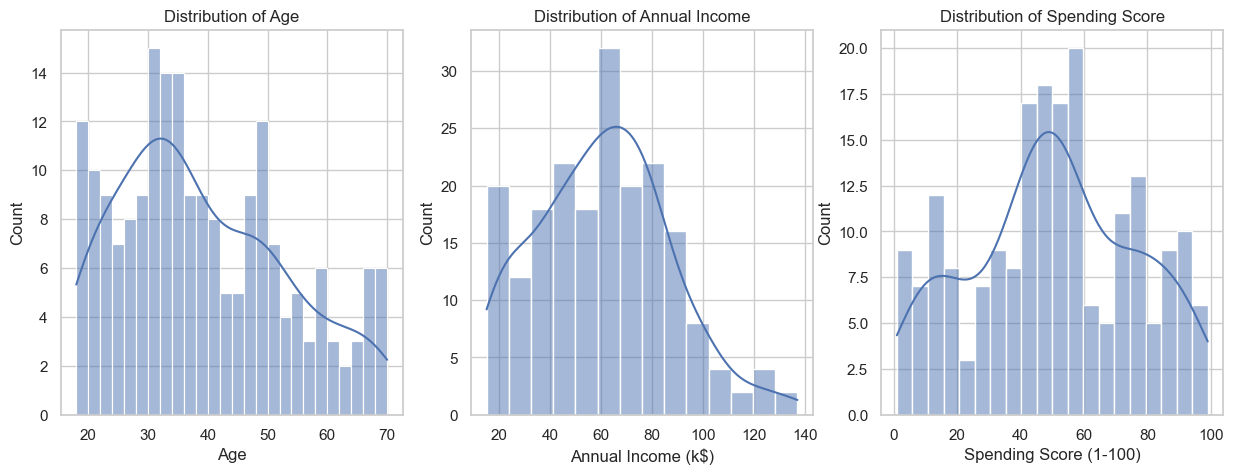

In [44]:
# Set the overall figure size
plt.figure(figsize=(15,5))

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Plot 1: Age distribution
sns.histplot(df['Age'], kde=True, color='b', ax=axes[0], bins=26)
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot 2: Annual Income distribution
sns.histplot(df['Annual Income (k$)'], kde=True, color='b', ax=axes[1], bins=14)
axes[1].set_title('Distribution of Annual Income')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')

# Plot 3: Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], kde=True, color='b', ax=axes[2], bins=20)
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')


# Show the plots
plt.show()

## Insights

**1. Age**
- The Age is spread across different age groups.
- Most mall visitors are between 20-40, with the peak age is in the 30-35 range.
- Less visitors are over the age of 50.

   **Conclusion**: The mall primarily attracts young to middle aged customers with a peak around 30 years old.

---

**2. Annual Income**
- Most visitors have an income between 40k-80k, with the peak at 60k.
- there is a right skew, less visitors has an income over 100k.

   **Conclusion**: The mall's customer base is dominated by middle-income earners.

---

**3. Spending Score**
- Spending score is normally distributed.
- Most visitors spend with a score 40-60.
- There are customers with very low and very high spending score.

   **Conclusion**: Most of the mall's customers are moderate spenders but still are spread normally.

